# generalized gods and demons
Inspired by Raymond Smullyan's "Gods, fter deamons, and mortals" puzzles from *To Mock a Mockingbird, and other logic puzzles*. These puzzles are similar to the familiar "knights and knave" puzzles.
> Shortly after Inspector Craig returned to London from his strange experience in Subterranea, he had a curious dream... Craig dreamed he spent nine days in a region in which dwelled gods, deamons and mortals. The gods of course, always told the truth, and the demons always lied. As to the mortals half were knights and half were knaves. As usual, the knights told the truth and the knaves lied.

In [610]:
# return the list that is the intersection of two lists
def intersect(a, b):
    return [item for item in a if item in b]
    
# return the list that is the union of two lists
def union(a, b):
    return list(a) + [item for item in b if item not in a]

# return the list that is the complement of two lists (based on the big list of pairs)
def complement(a):
    return [item for item in pairs if item not in a]

# return list a - list b
def difference(a,b):
    return [item for item in a if item not in b]

In [611]:
n = 2
truthfuls = ["knight","god"]
liars = ["knave","demon"]
#for i in range(n):
#    truthfuls.append("knight-" + str(i))
#    liars.append("knave-" + str(i))

In [612]:
#there are 4 kinds of inhabitants: gods, knights, knaves and demons
options = union(truthfuls, liars)
optionCounter = {}
for i in options:
    optionCounter[i] = 0

In [613]:
#let's have puzzles involving pairs of inhabitants - there are 16 possible pairs
pairs = []
for i in options:
    for j in options:
        pairs.append([i,j])
#print(pairs)

In [614]:
#lets figure out all the way 'A' could be lying, and all the ways 'B' could be lying
aLying = []
bLying = []
for i in options:
    for j in liars:
        aLying.append([j,i])
        bLying.append([i,j])
#print("A liying: " + str(aLying))
#print("B lying: " + str(bLying))

In [615]:
#let's have a function that creates the sets of pairs based on two lists
def fromLists(a,b):
    res = []
    for i in a:
        for j in b:
            res.append([i,j])
    return res

In [616]:
aTruthing = complement(aLying)
bTruthing = complement(bLying)

In [617]:
# aX(value) returns all pairs where 'A' is value
def aX(value):
    res = []
    for i in options:
        res.append([value, i])
    return res

#bX(value) returns all pairs where 'B' is value
def bX(value):
    res=[]
    for i in options:
        res.append([i,value])
    return res

In [618]:
# Let's have functions that create the states of affairs arising from A's statements, B's statements, 
# and then the solution must be in the intersection of the two.

def aPossible(aStatement):
    aTruths = intersect(aStatement, aTruthing)
    aLies = intersect(complement(aStatement),aLying)
    return union(aTruths, aLies)

def bPossible(bStatement): 
    bTruths = intersect(bStatement, bTruthing)
    bLies = intersect(complement(bStatement),bLying)
    return union(bTruths, bLies)

def solutions(aStatement, bStatement):
    return intersect(aPossible(aStatement),bPossible(bStatement))


## Some possible puzzle sets

In [619]:
# let's generate a whole bunch of simple statements
aStatements = []
bStatements = []
#print(aStatements)

In [620]:
# let's define some functions and structures to bring statements together with lists of pairs from those statements
def positiveStatement(option, sets):
    return {"statement":"I am a " + option, "type":option, "pairs": sets}
def negativeStatement(option, sets):
    return {"statement":"I am not a " + option,"type": option, "pairs": sets}

In [621]:
def addTypeStatements():
    for i in options:
        aStatements.append(positiveStatement(i,aX(i)))
        aStatements.append(negativeStatement(i,complement(aX(i))))
        bStatements.append(positiveStatement(i,bX(i)))
        bStatements.append(negativeStatement(i,complement(bX(i))))

In [622]:
def otherStatement(option, sets):
    return {"statement":"They are a " + option, "type":option, "pairs": sets}

def otherNotStatement(option, sets):
    return {"statement":"They are not a " + option, "type":option, "pairs": sets}

def addOtherTypeStatements():
    for i in options:
        aStatements.append(otherStatement(i,bX(i)))
        aStatements.append(otherNotStatement(i,complement(bX(i))))
        bStatements.append(otherStatement(i,aX(i)))
        bStatements.append(otherNotStatement(i,complement(aX(i))))    

In [623]:
def weAreBoth(option,sets):
    return {"statement":"We are " + option, "type":option, "pairs": sets}

def oneOfUsIs(option,sets):
    return {"statement":"At least one of us is a " + option, "type":option, "pairs": sets}

bothLiars = []
for i in liars:
    for j in liars:
        bothLiars.append([i,j])
bothTruthfuls = []
for i in truthfuls:
    for j in truthfuls:
        bothTruthfuls.append([i,j])
sameSide = union(bothLiars, bothTruthfuls)
diffSide = difference(pairs,sameSide)

oneLiar = union(aLying,bLying)
oneTruthful = union(aTruthing, bTruthing)

def addSides():
    aStatements.append(weAreBoth("liars", bothLiars))
    aStatements.append(weAreBoth("truthful", bothTruthfuls))
    aStatements.append(weAreBoth("on the same side", sameSide))
    aStatements.append(weAreBoth("on different sides", diffSide))
    
    aStatements.append(oneOfUsIs("liar", oneLiar))
    aStatements.append(oneOfUsIs("truth-teller", oneTruthful)) 
    
    bStatements.append(weAreBoth("liars", bothLiars))
    bStatements.append(weAreBoth("truthful", bothTruthfuls))
    bStatements.append(weAreBoth("on the same side",sameSide))
    
    bStatements.append(weAreBoth("on different sides",diffSide))
    
    bStatements.append(oneOfUsIs("liar", oneLiar))
    bStatements.append(oneOfUsIs("truth-teller", oneTruthful))


In [624]:

def addIamTheyAreSide():
    aStatements.append(positiveStatement("liar",aLying))
    aStatements.append(positiveStatement("truth-teller",aTruthing))
    aStatements.append(otherStatement("liar",bLying))
    aStatements.append(otherStatement("truth-teller",bTruthing))
    bStatements.append(positiveStatement("liar",bLying))
    bStatements.append(positiveStatement("truth-teller",bTruthing))
    bStatements.append(otherStatement("liar",aLying))
    bStatements.append(otherStatement("truth-teller",aTruthing))    

In [625]:
def iAmTheyAre(option1, option2, sets):
    return {"statement":"I am a  " + option1 + " and they are a " + option2, "type":option1, "pairs": sets}

def addIAmTheyAre(): 
    for i in options:
        for j in options:        
            aStatements.append(iAmTheyAre(i,j,[[i,j]]))
            bStatements.append(iAmTheyAre(i,j,[[j,i]]))


In [626]:
def iAmORTheyAre(option1, option2, sets):
    return {"statement":"I am a  " + option1 + " or they are a " + option2, "type":option1, "pairs": sets}

def addIAmOrTheyAre():
    for i in options:
        for j in options:        
            aStatements.append(iAmORTheyAre(i,j, union(aX(i),bX(j))))
            bStatements.append(iAmORTheyAre(i,j, union(aX(j),bX(i))))

            

In [627]:
addTypeStatements()
addOtherTypeStatements()
addSides() 
addIamTheyAreSide()    
addIAmTheyAre()
addIAmOrTheyAre()

In [628]:
allStatements = [y["statement"] for y in aStatements]
t = [[0 for i in allStatements] for j in allStatements]

#for i in range(len(aStatements)):
#        t.append([0]*len(aStatements))

def runAllStatements():
    counter = 1
    for a in aStatements:
        for b in bStatements:
            s = solutions(a["pairs"], b["pairs"])
            if (len(s) == 1):
                print("puzzle: " + str(counter))
                counter = counter + 1
                print("A says: " + a["statement"] + ", B says: " + b["statement"])
                print("The solution is that A is a "+ s[0][0] + " and B is a " + s[0][1])
                print("----------------------------------------------------------")
                optionCounter[s[0][0]] = optionCounter[s[0][0]]+1
                optionCounter[s[0][1]] = optionCounter[s[0][1]]+1
                
                t[allStatements.index(a["statement"])][allStatements.index(b["statement"])] = 1
runAllStatements()

puzzle: 1
A says: I am not a knight, B says: I am not a knight
The solution is that A is a god and B is a god
----------------------------------------------------------
puzzle: 2
A says: I am not a knight, B says: I am not a god
The solution is that A is a god and B is a knight
----------------------------------------------------------
puzzle: 3
A says: I am not a knight, B says: I am a knave
The solution is that A is a god and B is a demon
----------------------------------------------------------
puzzle: 4
A says: I am not a knight, B says: I am a demon
The solution is that A is a god and B is a knave
----------------------------------------------------------
puzzle: 5
A says: I am not a knight, B says: I am a  knave and they are a god
The solution is that A is a god and B is a demon
----------------------------------------------------------
puzzle: 6
A says: I am not a knight, B says: I am a  demon and they are a god
The solution is that A is a god and B is a knave
-----------------

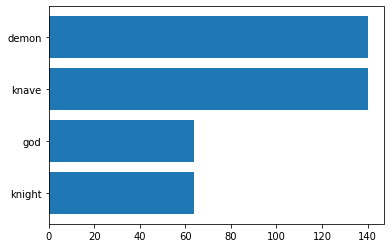

dict_values([64, 64, 140, 140])


In [629]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


height = optionCounter.values()
names =  optionCounter.keys()
x_axis = np.arange(len(names))    
plt.barh(x_axis, height)
plt.yticks(x_axis, names)
plt.show()
print(str(height))

In [630]:
print([y['statement'] for y in aStatements])
print(len(aStatements))

['I am a knight', 'I am not a knight', 'I am a god', 'I am not a god', 'I am a knave', 'I am not a knave', 'I am a demon', 'I am not a demon', 'They are a knight', 'They are not a knight', 'They are a god', 'They are not a god', 'They are a knave', 'They are not a knave', 'They are a demon', 'They are not a demon', 'We are liars', 'We are truthful', 'We are on the same side', 'We are on different sides', 'At least one of us is a liar', 'At least one of us is a truth-teller', 'I am a liar', 'I am a truth-teller', 'They are a liar', 'They are a truth-teller', 'I am a  knight and they are a knight', 'I am a  knight and they are a god', 'I am a  knight and they are a knave', 'I am a  knight and they are a demon', 'I am a  god and they are a knight', 'I am a  god and they are a god', 'I am a  god and they are a knave', 'I am a  god and they are a demon', 'I am a  knave and they are a knight', 'I am a  knave and they are a god', 'I am a  knave and they are a knave', 'I am a  knave and they a

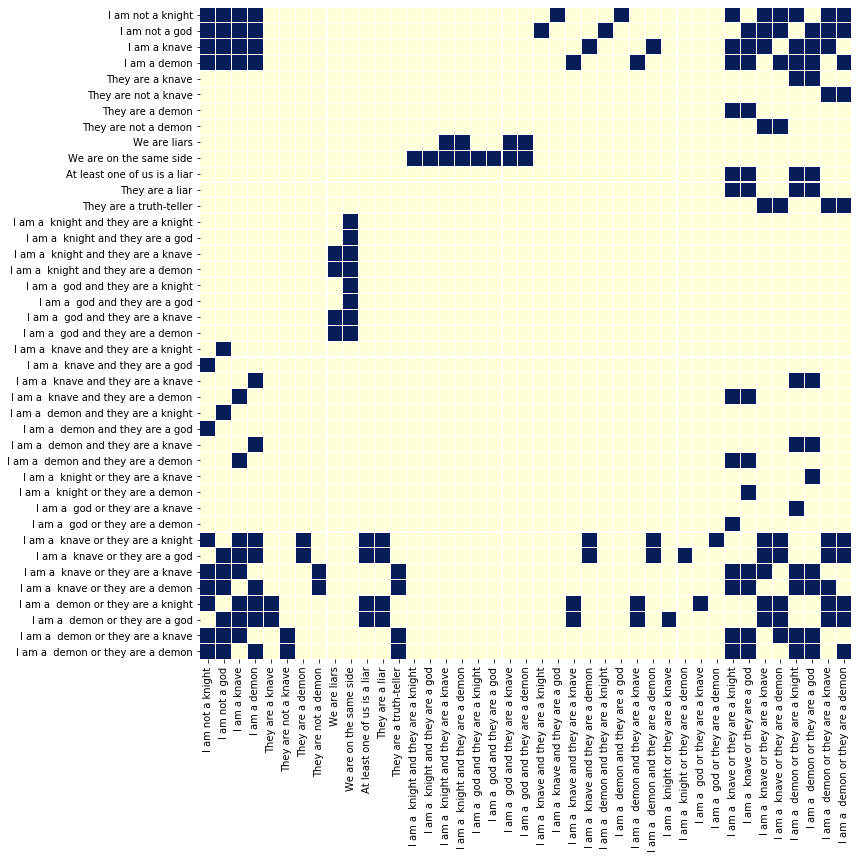

In [631]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
compress = True # compress True will remove rows and columns that are empty
size = 12

tdf = pd.DataFrame(data=t, index=allStatements, columns=allStatements)
if compress: 
    tdf = (tdf[tdf.sum(1)>0])
    tdf = tdf.transpose()
    tdf = (tdf[tdf.sum(1)>0])
fig, ax = plt.subplots(figsize=(size,size)) 
heat_map = sb.heatmap(tdf,cmap="YlGnBu",cbar=False,square=True,linewidths=0.1,xticklabels=1,yticklabels=1,ax=ax )
plt.show()